# STEP 2: Exploratory Data Analysis of Raw Results

This script performs an initial analysis of the raw results, focusing on
metadata (duration, size, tokens) to extract preliminary insights before
the formal quality evaluation.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the raw results file generated in Step 1
RAW_DATA_FILE = '../../data/raw/raw_results.csv'

In [3]:
df = pd.read_csv(RAW_DATA_FILE)
print(f"File '{RAW_DATA_FILE}' loaded. Total of {len(df)} samples")

File '../../data/raw/raw_results.csv' loaded. Total of 9600 samples


In [4]:
# Basic cleaning: remove rows where the response was not generated
df.dropna(subset=['response'], inplace=True)
df['response_length'] = df['response'].str.len()
print("Column 'response_length' (response size) calculated.")
print(f'Total of {len(df)} samples')

Column 'response_length' (response size) calculated.
Total of 9600 samples


## Analysis 1: Verbosity (Tokens)

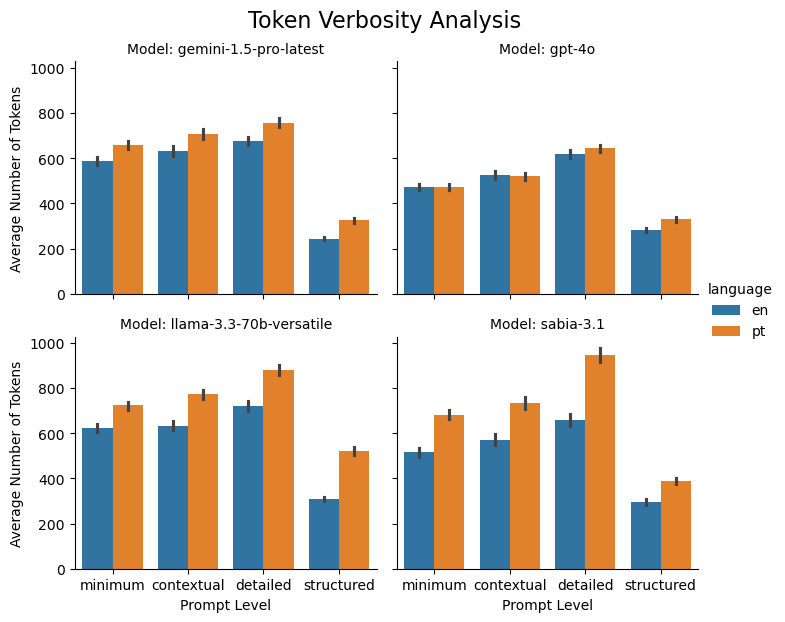

In [5]:
g_token = sns.catplot(
    data=df,
    x='prompt_level',
    y='total_tokens',
    hue='language',
    col='model',
    kind='bar',
    order=['minimum', 'contextual', 'detailed', 'structured'],
    col_wrap=2,
    height=3,
    aspect=1.2
)
g_token.fig.suptitle('Token Verbosity Analysis', y=1.03, fontsize=16)
g_token.set_axis_labels("Prompt Level", "Average Number of Tokens")
g_token.set_titles("Model: {col_name}")
plt.show()


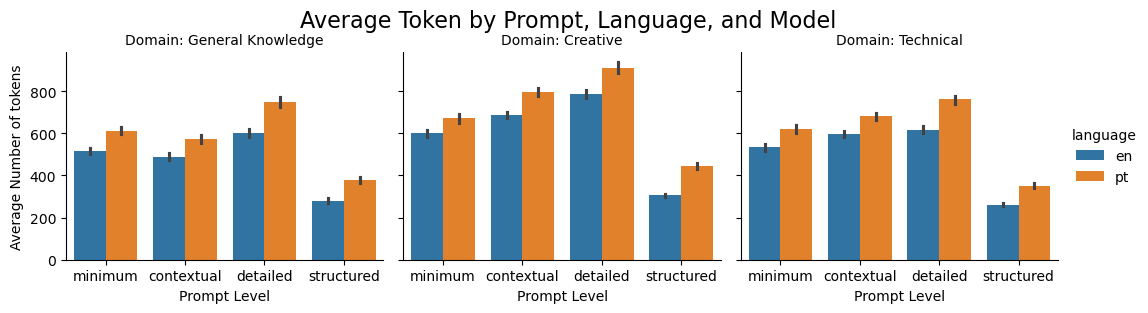

In [6]:
g = sns.catplot(
    data=df,
    x='prompt_level',
    y='total_tokens',
    hue='language',
    col='domain',
    kind='bar',
    order=['minimum', 'contextual', 'detailed', 'structured'],
    col_wrap=3,
    height=3,
    aspect=1.2
)
g.fig.suptitle('Average Token by Prompt, Language, and Model', y=1.03, fontsize=16)
g.set_axis_labels("Prompt Level", "Average Number of tokens")
g.set_titles("Domain: {col_name}")
plt.show()

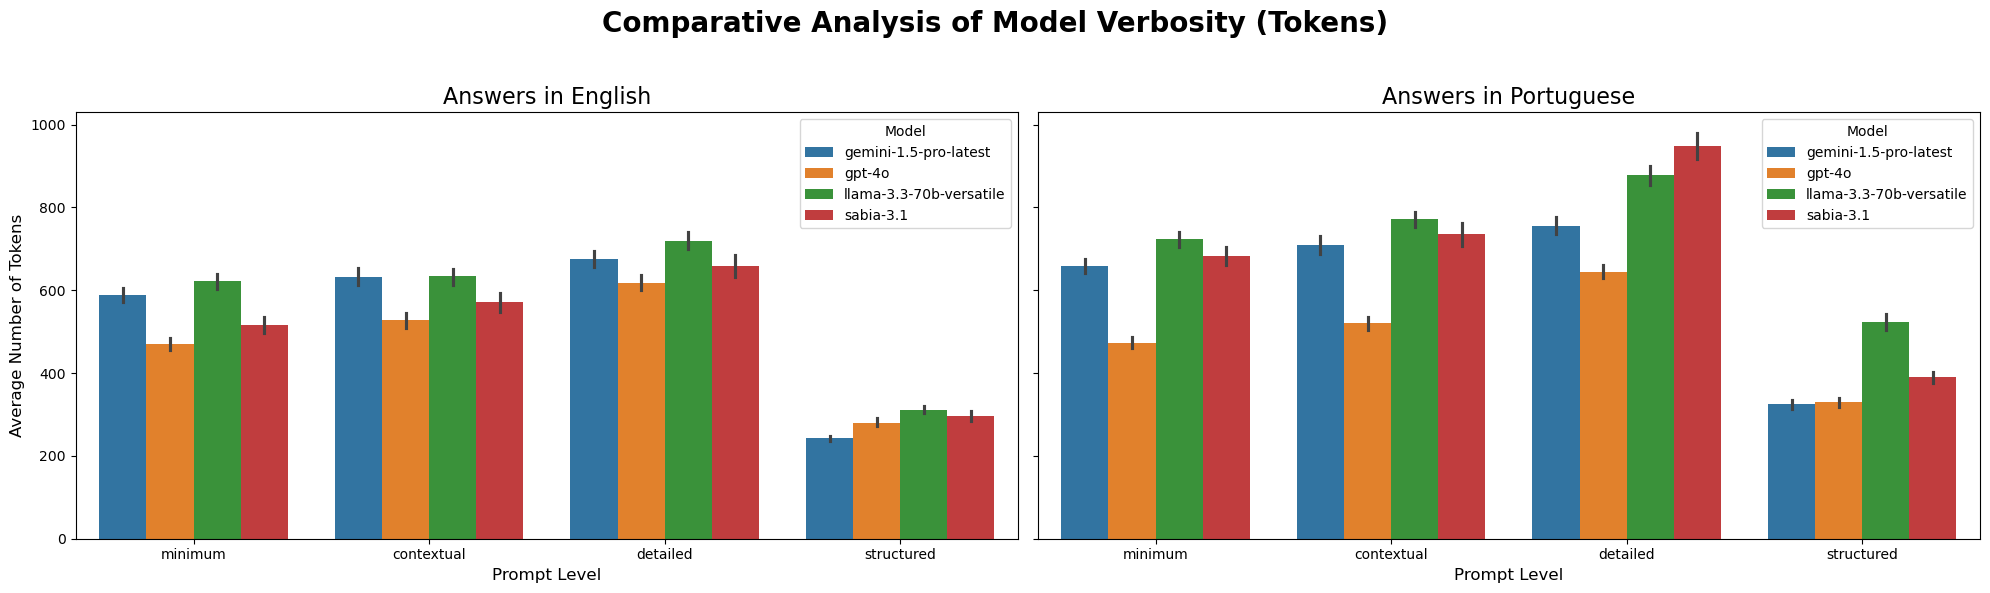

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6), sharey=True)
fig.suptitle('Comparative Analysis of Model Verbosity (Tokens)', fontsize=20, fontweight='bold')

sns.barplot(
    data=df[df['language'] == 'en'],
    x='prompt_level',
    y='total_tokens',
    hue='model',
    order=['minimum', 'contextual', 'detailed', 'structured'],
    ax=axes[0]
)
axes[0].set_title('Answers in English', fontsize=16)
axes[0].set_xlabel('Prompt Level', fontsize=12)
axes[0].set_ylabel('Average Number of Tokens', fontsize=12)
axes[0].legend(title='Model')

sns.barplot(
    data=df[df['language'] == 'pt'],
    x='prompt_level',
    y='total_tokens',
    hue='model',
    order=['minimum', 'contextual', 'detailed', 'structured'],
    ax=axes[1]
)
axes[1].set_title('Answers in Portuguese', fontsize=16)
axes[1].set_xlabel('Prompt Level', fontsize=12)
axes[1].set_ylabel('')
axes[1].legend(title='Model')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

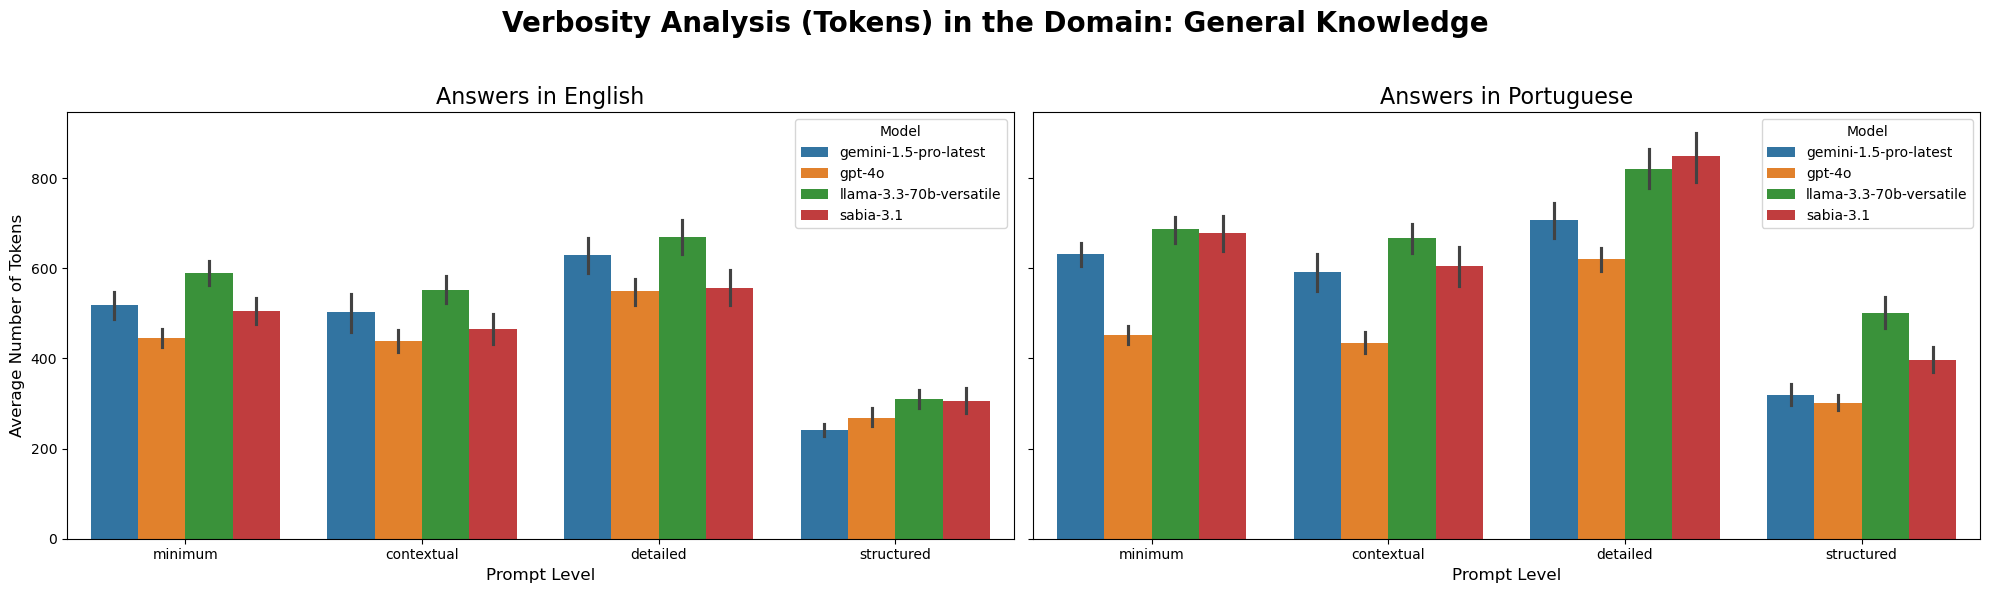

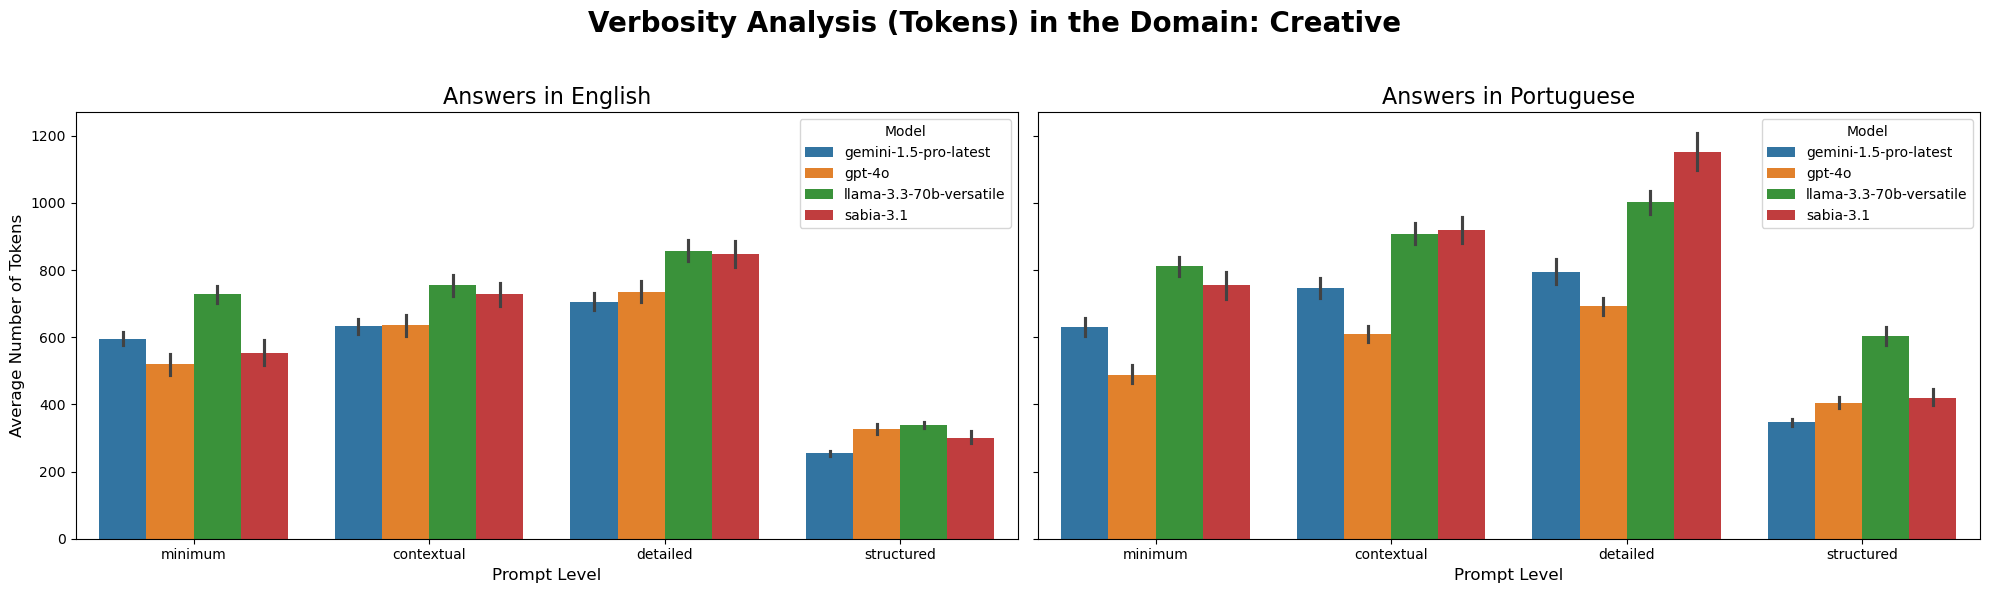

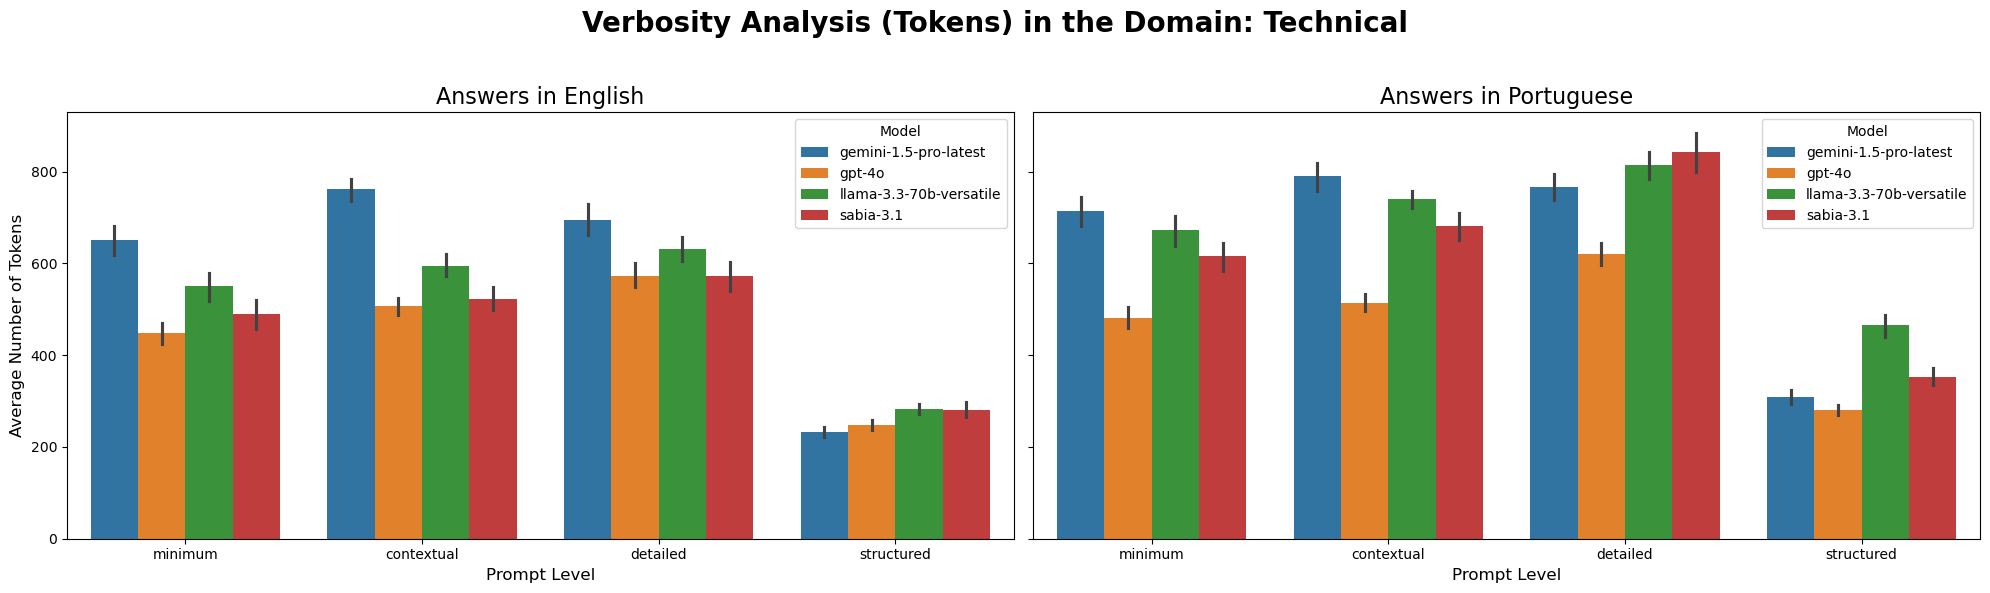

In [8]:
unique_domains = df['domain'].unique()

for domain in unique_domains:
    fig, axes = plt.subplots(1, 2, figsize=(20, 6), sharey=True)
    fig.suptitle(f'Verbosity Analysis (Tokens) in the Domain: {domain}', fontsize=20, fontweight='bold')

    english_data = df[(df['language'] == 'en') & (df['domain'] == domain)]
    sns.barplot(
        data=english_data,
        x='prompt_level',
        y='total_tokens',
        hue='model',
        order=['minimum', 'contextual', 'detailed', 'structured'],
        ax=axes[0]
    )
    axes[0].set_title('Answers in English', fontsize=16)
    axes[0].set_xlabel('Prompt Level', fontsize=12)
    axes[0].set_ylabel('Average Number of Tokens', fontsize=12)
    axes[0].legend(title='Model')

    portuguese_data = df[(df['language'] == 'pt') & (df['domain'] == domain)]
    sns.barplot(
        data=portuguese_data,
        x='prompt_level',
        y='total_tokens',
        hue='model',
        order=['minimum', 'contextual', 'detailed', 'structured'],
        ax=axes[1]
    )
    axes[1].set_title('Answers in Portuguese', fontsize=16)
    axes[1].set_xlabel('Prompt Level', fontsize=12)
    axes[1].set_ylabel('')
    axes[1].legend(title='Model')

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

**Análise:**

* Fica claro que o tipo de prompt tem um impacto direto no tamanho da resposta. Prompts detailed (detalhados) geram as respostas mais longas, enquanto prompts structured (estruturados) geram  as mais curtas em todos os cenários. Isso confirma que a engenharia de prompt é uma ferramenta eficaz para controlar a verbosidade do modelo.

* Tarefas no domínio Creative (Criativo) tendem a gerar respostas mais longas, indicando que os modelos são mais expansivos ao lidar com prompts que exigem criatividade.

**Perguntas:**

* Qual a correlação entre a contagem de tokens e a de caracteres para cada modelo em português vs. inglês? (Isso permitiria calcular um "fator de ineficiência de tokenização" para cada modelo e idioma?)

* Existe uma correlação direta entre o custo em tokens de uma resposta e a sua nota de qualidade final?

* As respostas estruturadas (structured), que são as mais baratas em termos de tokens, conseguem transmitir a mesma quantidade de informação útil e ter a mesma qualidade que as respostas detalhadas (detailed), que são as mais caras?

* O facto de o português ser um idioma consistentemente mais "caro" em termos de tokens afeta a qualidade da resposta? Ou seja, os modelos são tão bons em português quanto em inglês, apenas precisam de mais "espaço" (tokens) para se expressarem pelo português ter uma maior variedade de conjugações verbais, acentos e contrações?

## Analysis 2: Verbosity (Characters)

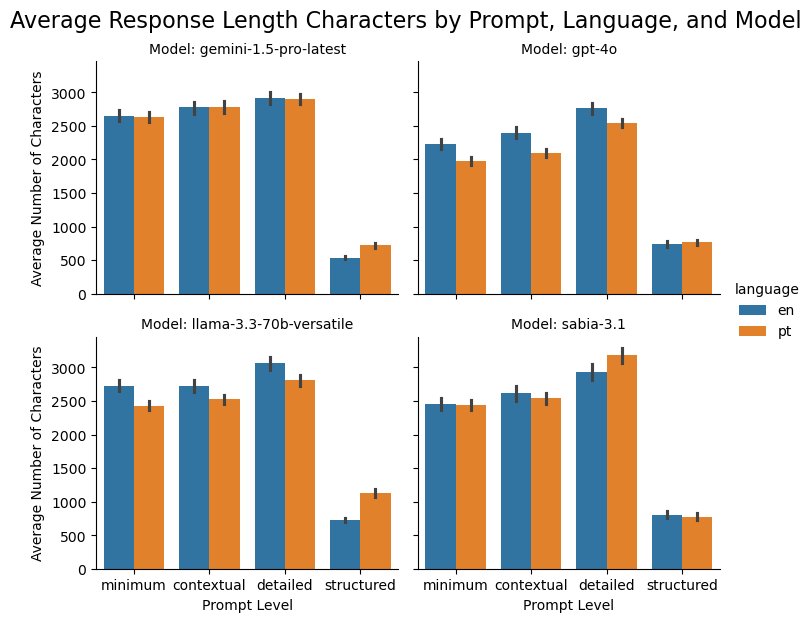

In [9]:
g = sns.catplot(
    data=df,
    x='prompt_level',
    y='response_length',
    hue='language',
    col='model',
    kind='bar',
    order=['minimum', 'contextual', 'detailed', 'structured'],
    col_wrap=2,
    height=3,
    aspect=1.2
)
g.fig.suptitle('Average Response Length Characters by Prompt, Language, and Model', y=1.03, fontsize=16)
g.set_axis_labels("Prompt Level", "Average Number of Characters")
g.set_titles("Model: {col_name}")
plt.show()

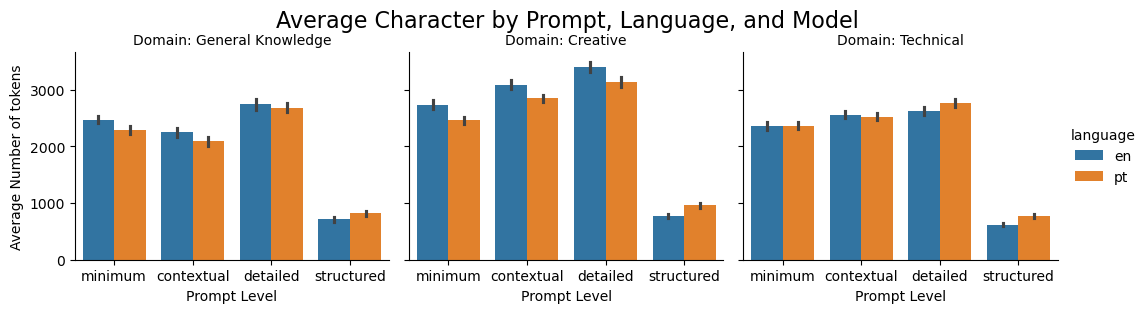

In [10]:
g = sns.catplot(
    data=df,
    x='prompt_level',
    y='response_length',
    hue='language',
    col='domain',
    kind='bar',
    order=['minimum', 'contextual', 'detailed', 'structured'],
    col_wrap=3,
    height=3,
    aspect=1.2
)
g.fig.suptitle('Average Character by Prompt, Language, and Model', y=1.03, fontsize=16)
g.set_axis_labels("Prompt Level", "Average Number of tokens")
g.set_titles("Domain: {col_name}")
plt.show()

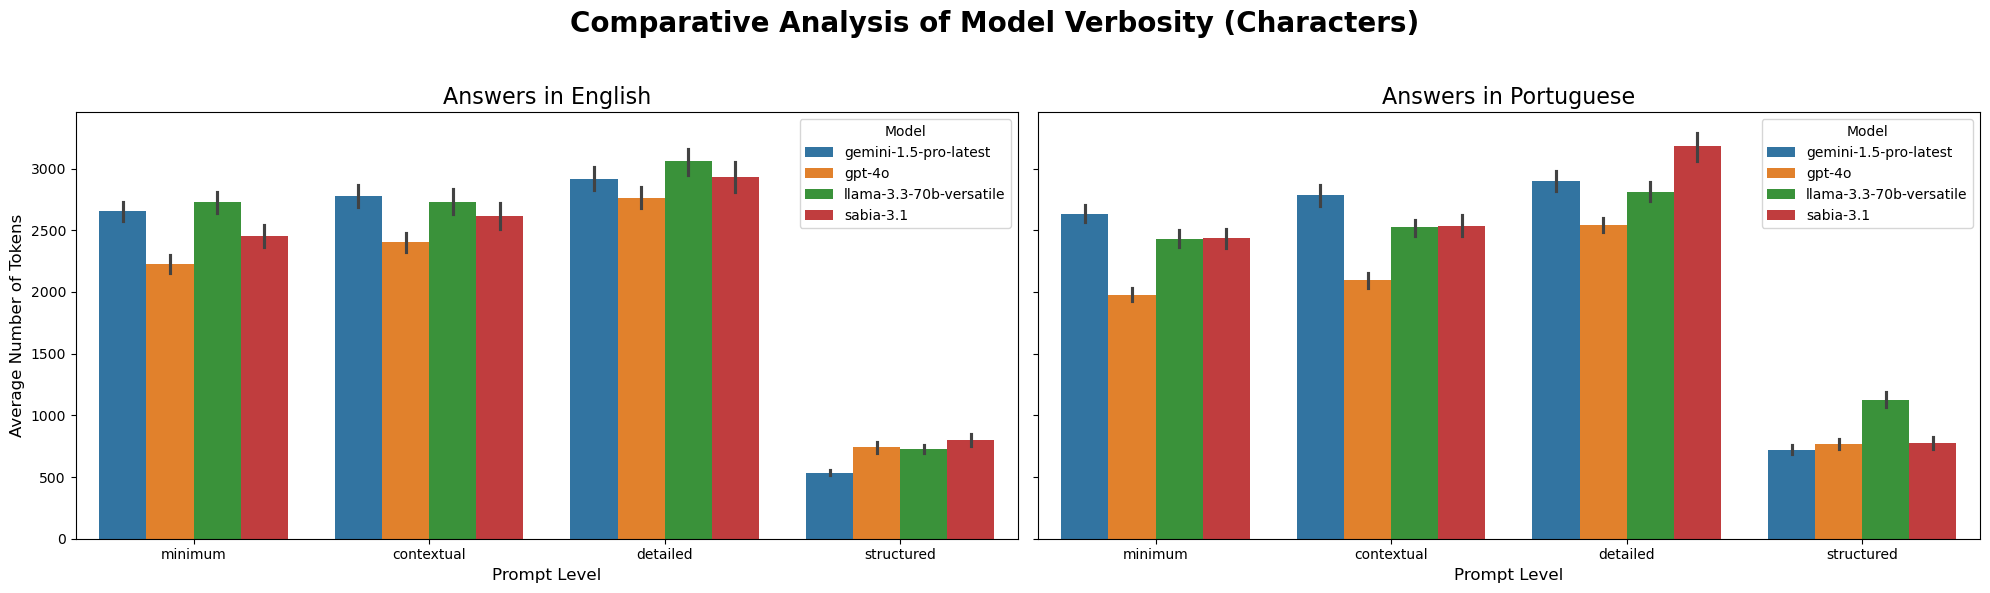

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6), sharey=True)
fig.suptitle('Comparative Analysis of Model Verbosity (Characters)', fontsize=20, fontweight='bold')

sns.barplot(
    data=df[df['language'] == 'en'],
    x='prompt_level',
    y='response_length',
    hue='model',
    order=['minimum', 'contextual', 'detailed', 'structured'],
    ax=axes[0]
)
axes[0].set_title('Answers in English', fontsize=16)
axes[0].set_xlabel('Prompt Level', fontsize=12)
axes[0].set_ylabel('Average Number of Tokens', fontsize=12)
axes[0].legend(title='Model')

sns.barplot(
    data=df[df['language'] == 'pt'],
    x='prompt_level',
    y='response_length',
    hue='model',
    order=['minimum', 'contextual', 'detailed', 'structured'],
    ax=axes[1]
)
axes[1].set_title('Answers in Portuguese', fontsize=16)
axes[1].set_xlabel('Prompt Level', fontsize=12)
axes[1].set_ylabel('')
axes[1].legend(title='Model')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**Análise:**

* A forma como a verbosidade varia entre os idiomas é uma característica de cada modelo. O gemini-1.5-pro e o llama-3.3-70b mostram as maiores discrepâncias, com ambos a gerar respostas mais longas em português. Já o gpt-4o e o sabia-3.1 são mais equilibrados, gerando respostas de comprimento muito semelhante em ambos os idiomas.

* As respostas em português (pt) costumam consumir mais tokens do que as respostas em inglês (en), mesmo quando o número de caracteres é semelhante. Isso se deve à forma como os tokenizadores processam idiomas latinos.

**Perguntas:**

* As respostas estruturadas, apesar de serem significativamente mais curtas, têm uma qualidade (precisão, completude) maior do que as respostas detalhadas, que são mais longas?

* A maior verbosidade em certos modelos traduz-se em maior qualidade ou apenas em mais texto para transmitir a mesma informação?

* O domínio Criativo, que gera as respostas mais longas, também produz as respostas de maior qualidade, ou a sua natureza aberta leva a mais erros?

## Analysis 3: Latency and Reliability Metrics

Estes gráficos focam no percentil 95 (P95), que é uma ótima métrica para entender a confiabilidade e o comportamento dos modelos no "pior cenário" — ou seja, qual o tempo de resposta e o custo de tokens máximos em 95% das vezes.

In [12]:
latency_metrics = df.groupby(['model', 'language', 'domain']).agg(
    median_duration=('duration_s', 'median'),
    iqr_duration=('duration_s', lambda x: x.quantile(0.75) - x.quantile(0.25)),
    p95_duration=('duration_s', lambda x: x.quantile(0.95))
).reset_index()

print("Detailed Latency Metrics by Model and Language:")
display(latency_metrics.round(2))

Detailed Latency Metrics by Model and Language:


,model,language,domain,median_duration,iqr_duration,p95_duration
0,gemini-1.5-pro-latest,en,Creative,12.27,6.99,16.83
1,gemini-1.5-pro-latest,en,General Knowledge,8.74,7.90,14.78
2,gemini-1.5-pro-latest,en,Technical,10.96,8.52,14.90
3,gemini-1.5-pro-latest,pt,Creative,13.65,8.18,20.79
4,gemini-1.5-pro-latest,pt,General Knowledge,10.89,7.21,16.59
5,gemini-1.5-pro-latest,pt,Technical,12.41,7.60,16.84
6,gpt-4o,en,Creative,7.94,5.67,15.06
7,gpt-4o,en,General Knowledge,5.51,3.88,10.77
8,gpt-4o,en,Technical,5.07,3.39,8.46
9,gpt-4o,pt,Creative,7.38,4.70,14.46



* `median_duration`: O tempo de resposta típico (o valor do meio). É uma medida mais robusta que a média para entender a velocidade geral.

* `iqr_duration` (Intervalo Interquartil): A diferença entre o 75º e o 25º percentil. Um IQR baixo significa que a performance do modelo é muito consistente e previsível. Um IQR alto significa que os tempos de resposta variam bastante.

* `p95_duration`: O tempo de resposta no pior cenário.

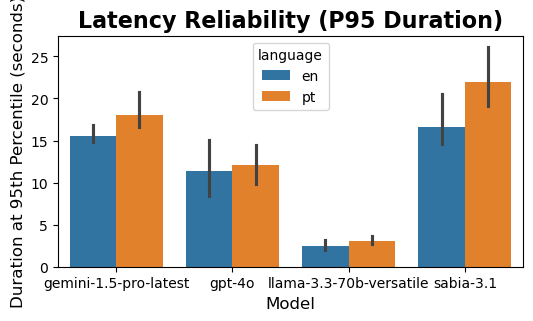

In [13]:
plt.figure(figsize=(6, 3))
sns.barplot(
data=latency_metrics,
x='model',
y='p95_duration',
hue='language',
)
plt.title('Latency Reliability (P95 Duration)', fontsize=16, fontweight='bold')
plt.ylabel('Duration at 95th Percentile (seconds)', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.show()

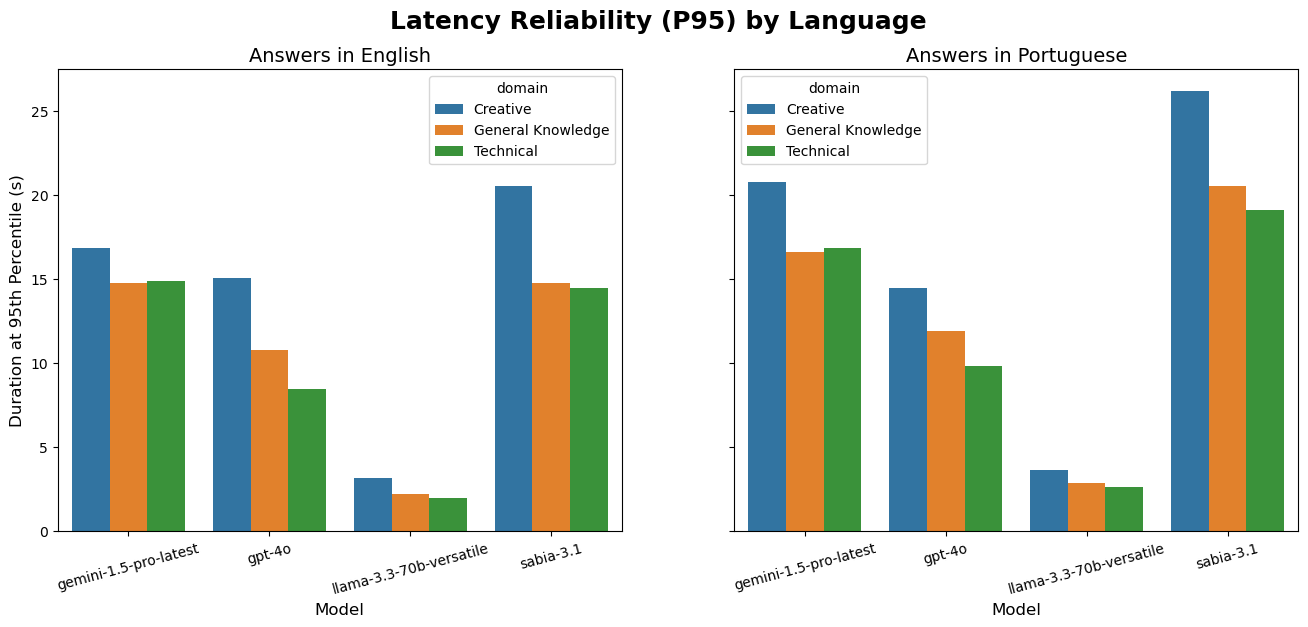

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
fig.suptitle('Latency Reliability (P95) by Language', fontsize=18, fontweight='bold')


sns.barplot(
    data=latency_metrics[latency_metrics['language'] == 'en'],
    x='model',
    y='p95_duration',
    hue='domain',
    ax=axes[0]
)
axes[0].set_title('Answers in English', fontsize=14)
axes[0].set_ylabel('Duration at 95th Percentile (s)', fontsize=12)
axes[0].set_xlabel('Model', fontsize=12)
axes[0].tick_params(axis='x', rotation=15)

sns.barplot(
    data=latency_metrics[latency_metrics['language'] == 'pt'],
    x='model',
    y='p95_duration',
    hue='domain',
    ax=axes[1]
)
axes[1].set_title('Answers in Portuguese', fontsize=14)
axes[1].set_ylabel('')
axes[1].set_xlabel('Model', fontsize=12)
axes[1].tick_params(axis='x', rotation=15)
plt.show()

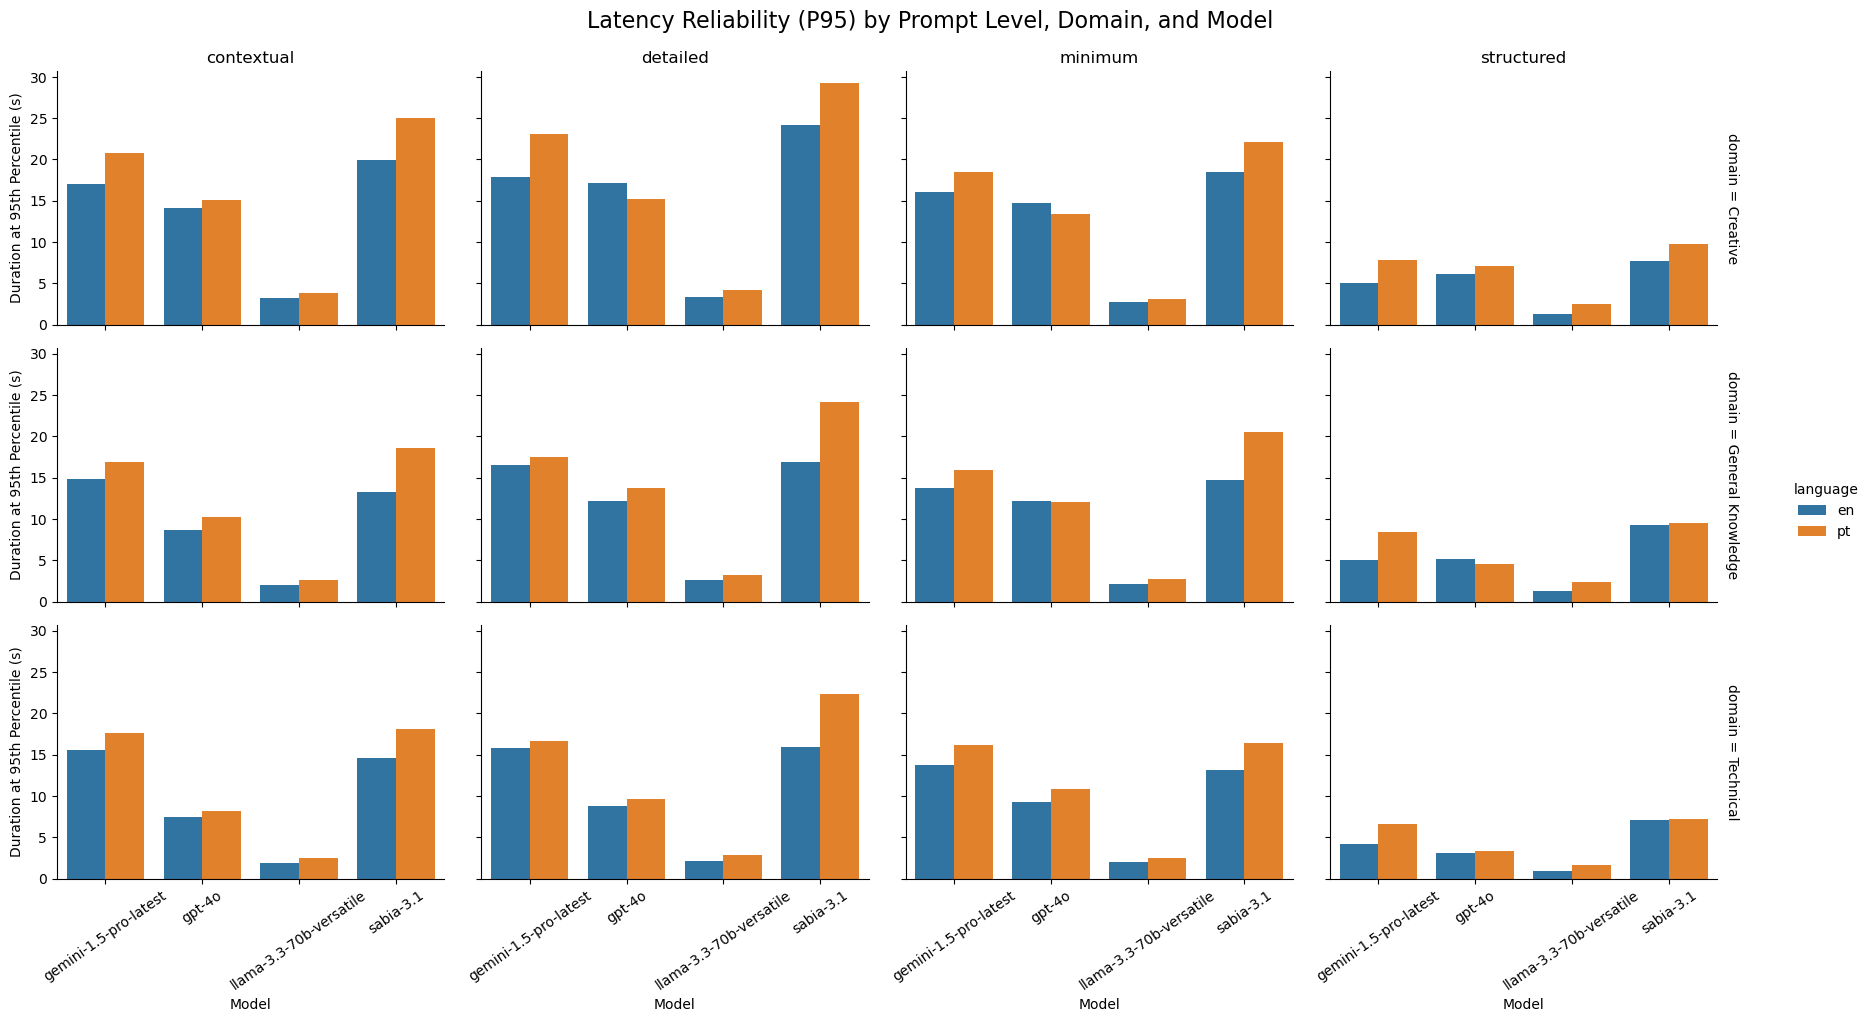

In [15]:
latency_metrics_detailed = df.groupby(['model', 'language', 'domain', 'prompt_level']).agg(
    p95_duration=('duration_s', lambda x: x.quantile(0.95))
).reset_index()

g = sns.catplot(
    data=latency_metrics_detailed,
    x='model',
    y='p95_duration',
    hue='language',
    col='prompt_level',
    row='domain',
    kind='bar',
    height=3,
    aspect=1.5,
    margin_titles=True
)

g.fig.suptitle('Latency Reliability (P95) by Prompt Level, Domain, and Model', y=1.03, fontsize=16)
for i, ax in enumerate(g.axes.flat):
    if ax.get_title():
        title_text = ax.get_title().split(' = ')[-1]
        ax.set_title(title_text)

g.tick_params(axis='x', rotation=35)
g.set_axis_labels("Model", "Duration at 95th Percentile (s)")
plt.show()

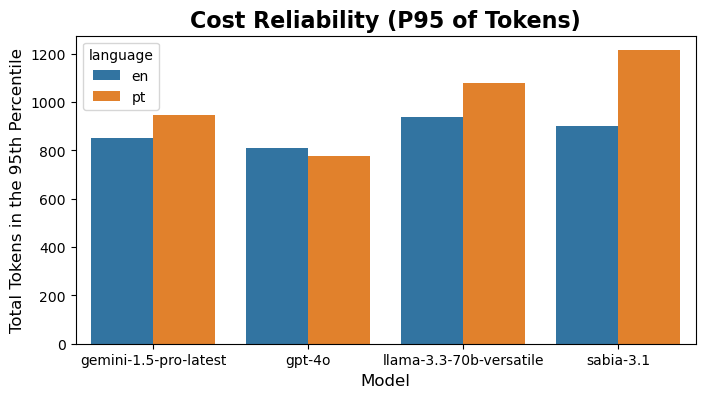

In [16]:
cost_p95 = df.groupby(['model', 'language'])['total_tokens'].quantile(0.95).reset_index()
cost_p95 = cost_p95.rename(columns={'total_tokens': 'p95_tokens'})

plt.figure(figsize=(8, 4))
sns.barplot(
    data=cost_p95,
    x='model',
    y='p95_tokens',
    hue='language',
)
plt.title('Cost Reliability (P95 of Tokens)', fontsize=16, fontweight='bold')
plt.ylabel('Total Tokens in the 95th Percentile', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.show()

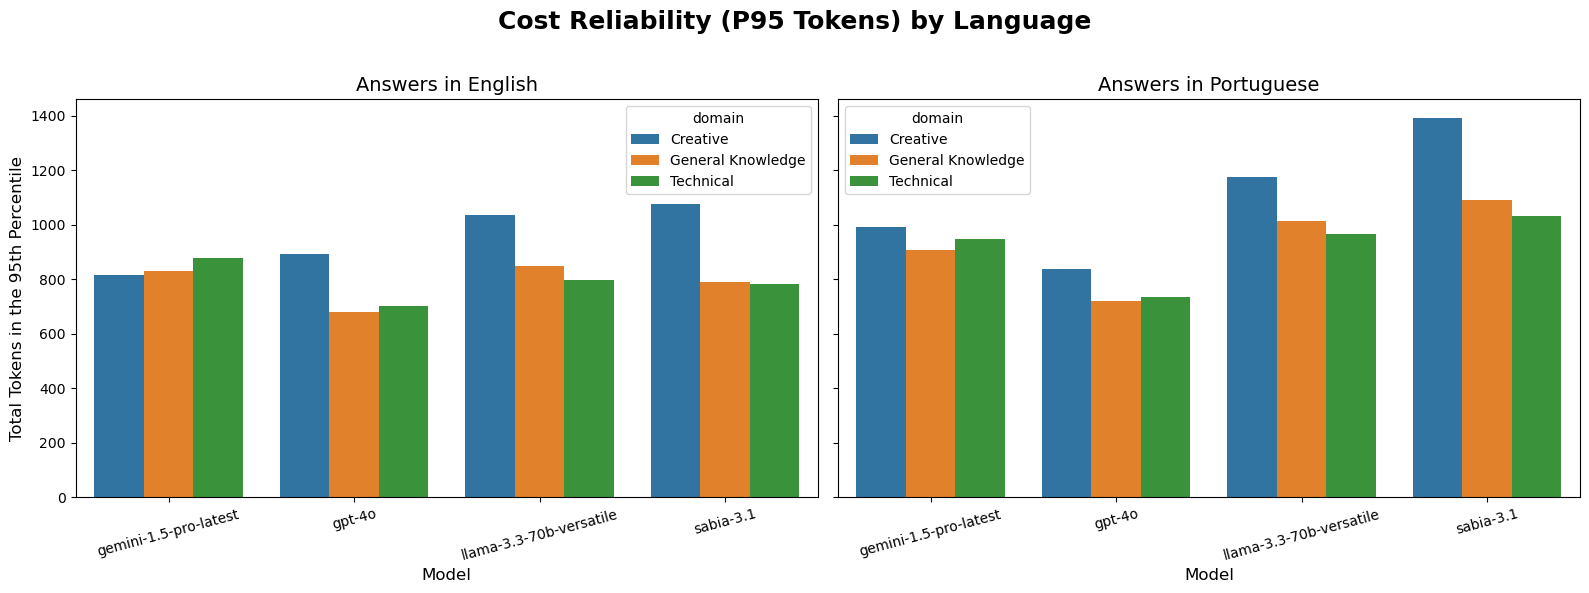

In [17]:
cost_p95 = df.groupby(['model', 'language', 'domain'])['total_tokens'].quantile(0.95).reset_index()
cost_p95 = cost_p95.rename(columns={'total_tokens': 'p95_tokens'})

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
fig.suptitle('Cost Reliability (P95 Tokens) by Language', fontsize=18, fontweight='bold')

sns.barplot(
    data=cost_p95[cost_p95['language'] == 'en'],
    x='model',
    y='p95_tokens',
    hue='domain',
    ax=axes[0]
)
axes[0].set_title('Answers in English', fontsize=14)
axes[0].set_ylabel('Total Tokens in the 95th Percentile', fontsize=12)
axes[0].set_xlabel('Model', fontsize=12)
axes[0].tick_params(axis='x', rotation=15)

# Gráfico para Português
sns.barplot(
    data=cost_p95[cost_p95['language'] == 'pt'],
    x='model',
    y='p95_tokens',
    hue='domain',
    ax=axes[1]
)
axes[1].set_title('Answers in Portuguese', fontsize=14)
axes[1].set_ylabel('')
axes[1].set_xlabel('Model', fontsize=12)
axes[1].tick_params(axis='x', rotation=15)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

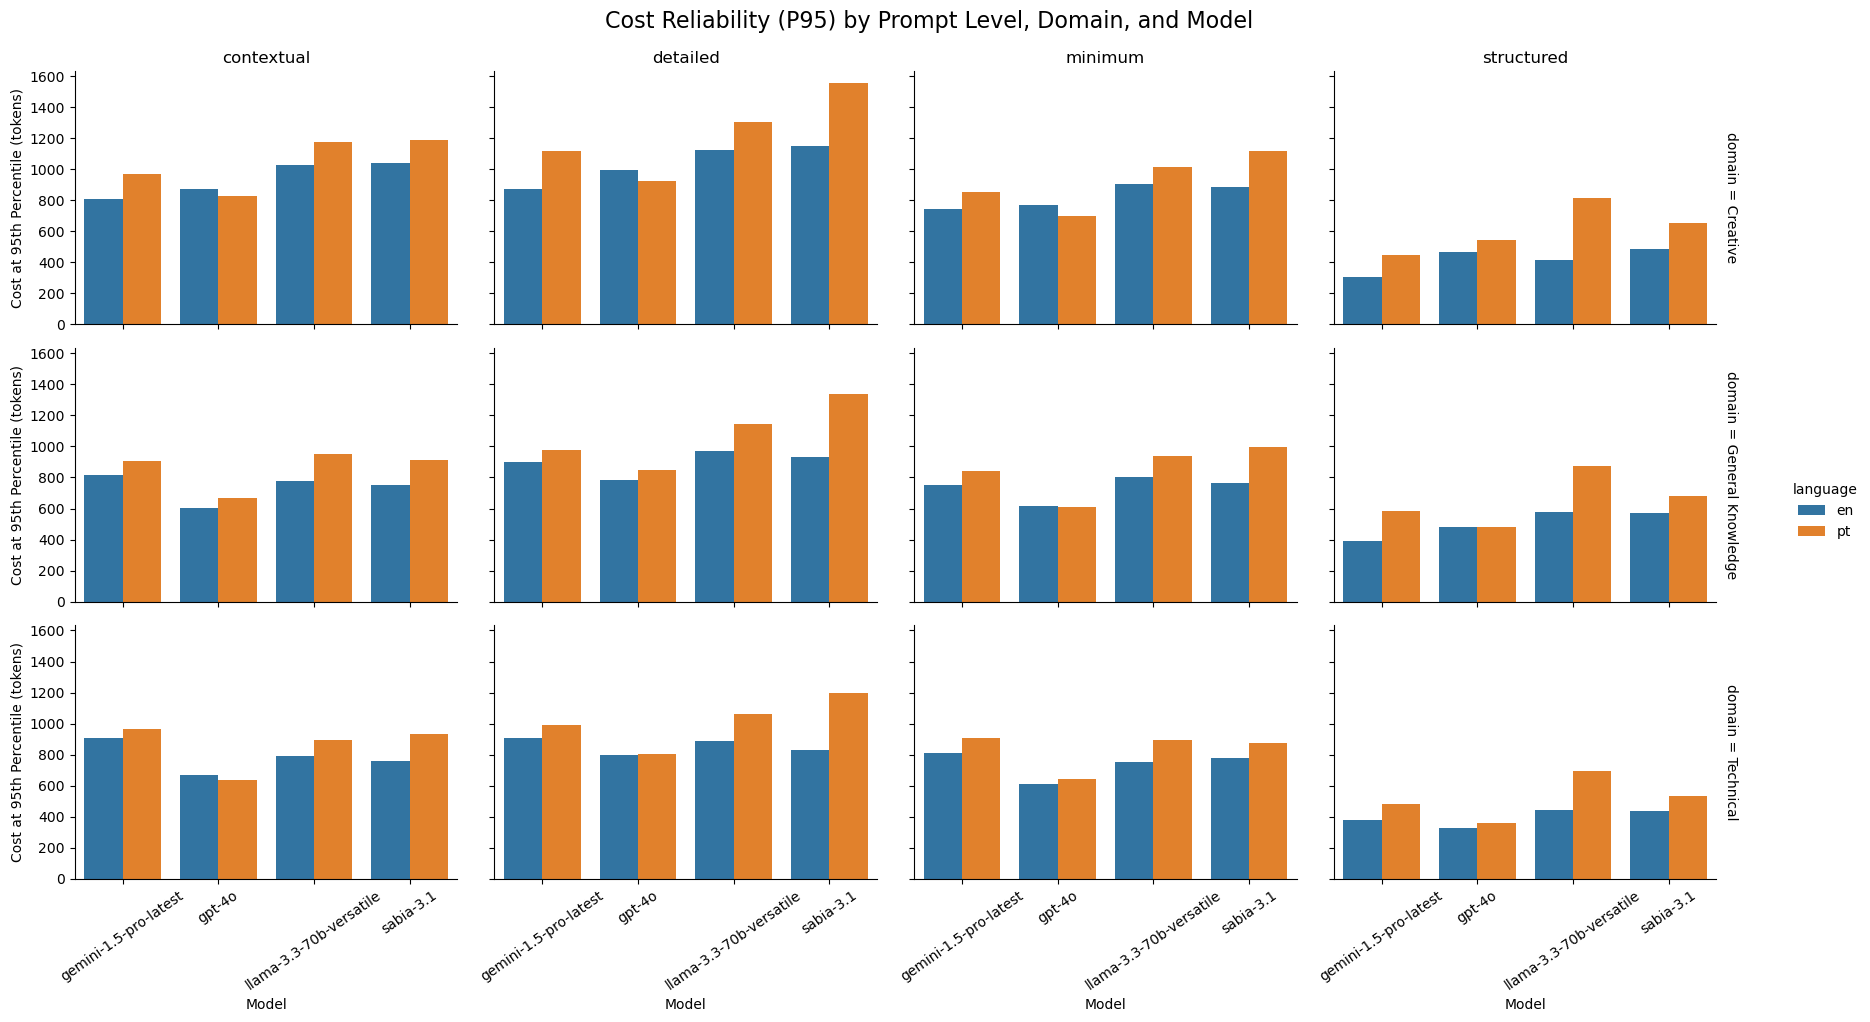

In [18]:
cost_metrics_detailed = df.groupby(['model', 'language', 'domain', 'prompt_level']).agg(
    p95_tokens=('total_tokens', lambda x: x.quantile(0.95))
).reset_index()

g = sns.catplot(
    data=cost_metrics_detailed,
    x='model',
    y='p95_tokens',
    hue='language',
    col='prompt_level',
    row='domain',
    kind='bar',
    height=3,
    aspect=1.5,
    margin_titles=True
)

g.fig.suptitle('Cost Reliability (P95) by Prompt Level, Domain, and Model', y=1.03, fontsize=16)
for i, ax in enumerate(g.axes.flat):
    if ax.get_title():
        title_text = ax.get_title().split(' = ')[-1]
        ax.set_title(title_text)

g.tick_params(axis='x', rotation=35)
g.set_axis_labels("Model", "Cost at 95th Percentile (tokens)")
plt.show()

**Análise:**

* O GPT-4o se destaca por ter o menor custo de tokens no P95, tornando-o o mais previsível e potencialmente mais econômico em escala.

* O processamento em português consistentemente leva a uma maior latência e a um maior custo de tokens no P95. Isso sugere que as tarefas em português podem ser computacionalmente mais pesadas para a maioria desses modelos, resultando em picos de performance piores.

* As respostas em português (pt) levam, em geral, mais tempo para serem processadas por todos os modelos.

**Perguntas:**

* A  maior velocidade e concisão das respostas structured (estruturadas) vêm ao custo da perda de informação relevante, ou elas são realmente mais eficientes em transmitir a mesma qualidade em menos tempo?

* A maior variabilidade de tempo de resposta no domínio creative (criativo) está correlacionada com uma maior variabilidade também na qualidade das respostas?